# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane were the most tested drugs, but they also seemed to produce the best results.
- Both male and female mice had equal representation, meaning the drugs are seemingly equal in efficacy for each gender.
- Because the correlation is 0.84, we can conclude that added weight has a negative impact on tumor size. When weight goes up, so does tumor volume.
- When looking at mouse l509, Capomulin was effective in reducing the tumor size on the mouse.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
#mouse_data_complete = pd.merge(mouse_metadata, study_results, how="inner", on=["Mouse ID", "Mouse ID"])
combined_df = study_results.merge(mouse_metadata, on="Mouse ID")

# Display the data table for preview
#mouse_data_complete.head()
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
num_mice = len(combined_df["Mouse ID"].unique())
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl_mice_ID = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
dupl_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupl_mice_data = combined_df.set_index("Mouse ID")
dupl_mice_data.loc["g989"]

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
g989,0,45.000000,0,Propriva,Female,21,26
g989,0,45.000000,0,Propriva,Female,21,26
g989,5,48.786801,0,Propriva,Female,21,26
g989,5,47.570392,0,Propriva,Female,21,26
g989,10,51.745156,0,Propriva,Female,21,26
g989,10,49.880528,0,Propriva,Female,21,26
g989,15,51.325852,1,Propriva,Female,21,26
g989,15,53.442020,0,Propriva,Female,21,26
g989,20,55.326122,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = dupl_mice_data.drop(["g989"])
combined_clean

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,0,45.000000,0,Capomulin,Female,9,22
b128,5,45.651331,0,Capomulin,Female,9,22
b128,10,43.270852,0,Capomulin,Female,9,22
b128,15,43.784893,0,Capomulin,Female,9,22
b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...
m601,25,33.118756,1,Capomulin,Male,22,17
m601,30,31.758275,1,Capomulin,Male,22,17
m601,35,30.834357,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_clean_reset = combined_clean.reset_index()

num_mice2 = len(combined_clean_reset["Mouse ID"].unique())
num_mice2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_df = combined_clean_reset.groupby(["Drug Regimen"])

tumor_volume_mean = tumor_volume_df["Tumor Volume (mm3)"].mean()
tumor_volume_median = tumor_volume_df["Tumor Volume (mm3)"].median()
tumor_volume_variance = tumor_volume_df["Tumor Volume (mm3)"].var()
tumor_volume_stdev = tumor_volume_df["Tumor Volume (mm3)"].std()
tumor_volume_sem = tumor_volume_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
final_tumor_df = pd.DataFrame({"Mean Tumor Volume" : tumor_volume_mean,
                              "Median Tumor Volume" : tumor_volume_median,
                              "Tumor Volume Variance" : tumor_volume_variance,
                              "Tumor Volume Std. Dev." : tumor_volume_stdev,
                              "Tumor Volume Std. Err." : tumor_volume_sem})
final_tumor_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistics_df = combined_clean_reset.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

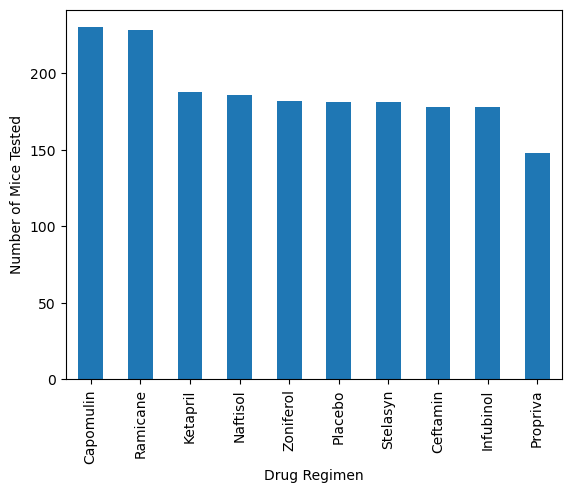

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_per_mouse = combined_clean_reset.groupby(["Drug Regimen"])["Timepoint"].count()
tpm = timepoints_per_mouse.sort_values(ascending = False).plot(kind = "bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

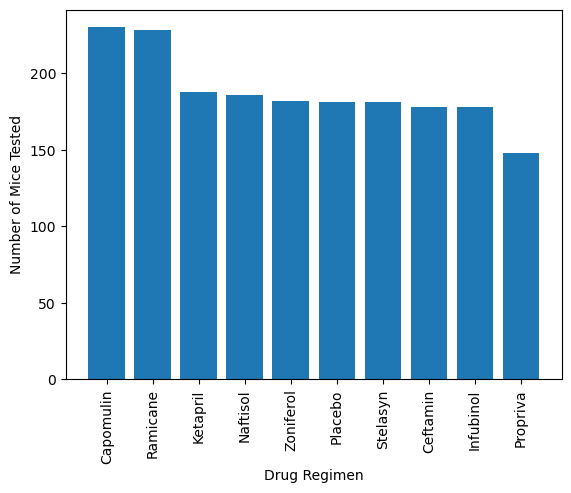

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
        # to sort by descending
data_sorted = timepoints_per_mouse.sort_values(ascending=False)

plt.bar(data_sorted.index, data_sorted.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")
plt.show()

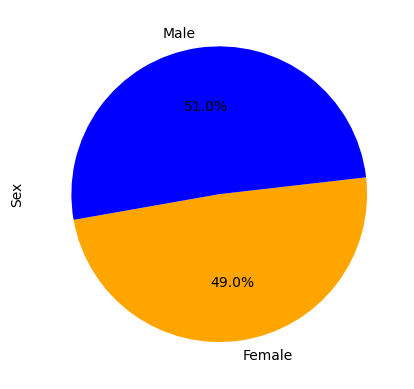

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender = combined_clean_reset.groupby(["Sex"])["Sex"].count()
colors = ["orange","blue"]
mg = mouse_gender.plot(kind = "pie", y = "Sex", autopct = "%1.1f%%", startangle = 190, colors = colors)

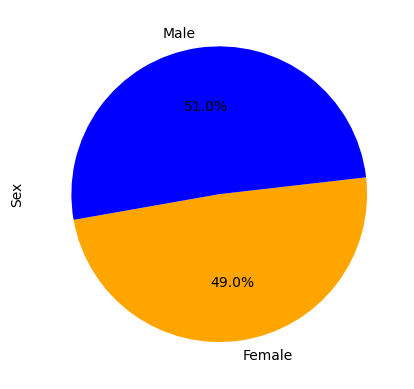

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
colors = ["orange","blue"]
plt.pie(mouse_gender, autopct = "%1.1f%%", startangle = 190, labels = labels, colors = colors)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
#steps to get data in correct form..
max_timepoint = combined_clean_reset.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint = max_timepoint.reset_index()

max_timepoint_merge = max_timepoint.merge(combined_clean_reset, on = ["Mouse ID","Timepoint"], how = "left")

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = max_timepoint_merge.loc[max_timepoint_merge["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper - lower 
    
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f" {drug}'s potential outliers are: {outliers}")
    

 Capomulin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ramicane's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ceftamin's potential outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


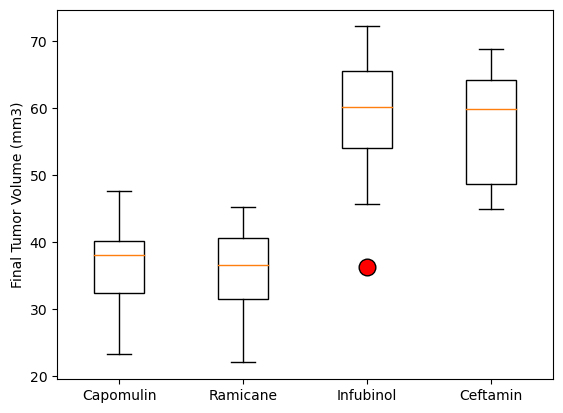

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")

#props
flierprops = dict(marker="o", markerfacecolor = "red", markersize = 12, linestyle = "none", 
             markeredgecolor = "black")

ax.boxplot(tumor_vol_data, labels=treatments, boxprops=dict(facecolor=(0,0,0,0)), 
           widths = 0.4, patch_artist=True, vert=True, flierprops = flierprops)

plt.savefig("boxplot")
plt.show()

## Line and Scatter Plots

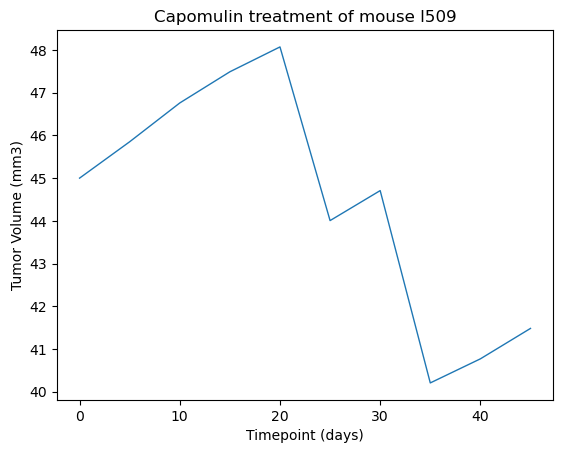

In [34]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = combined_clean_reset.loc[combined_clean_reset["Drug Regimen"] == "Capomulin",:]
mouse_l509 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]

#y and x axis
x_axis = mouse_l509["Timepoint"]
y_axis = mouse_l509["Tumor Volume (mm3)"]

#labels and title
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis, linewidth = 1)

plt.savefig("linechart")
plt.show()

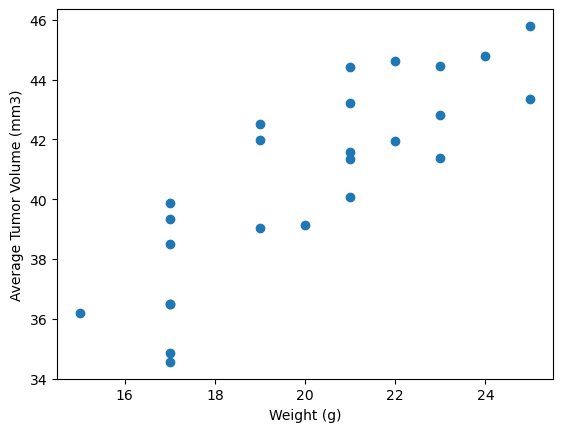

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin_df.groupby(["Mouse ID"]).mean()
x_axis = capomulin_avg["Weight (g)"]
y_axis = capomulin_avg["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is: 0.84


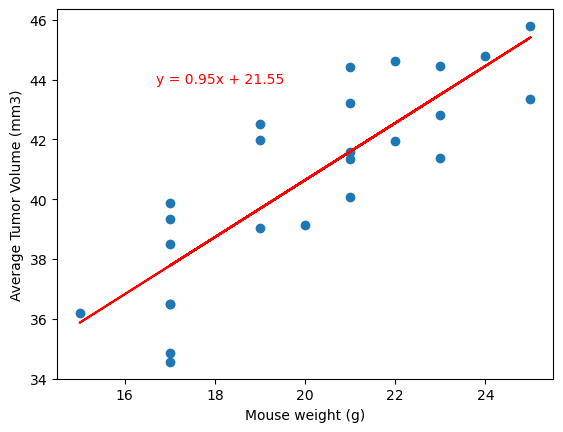

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is: {correlation}")


x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction", color="red")


plt.savefig("linear_regression")
plt.show()
